In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# EDA

In [2]:
df = pd.read_csv('telecom_customer_churn.csv')
df.head()

Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   

   Zip Code   Latitude   Longitude  Number of Referrals  ...   Payment Method  \
0     93225  34.827662 -118.999073                    2  ...      Credit Card   
1     91206  34.162515 -118.203869                    0  ...      Credit Card   
2     92627  33.645672 -117.922613                    0  ...  Bank Withdrawal   
3     94553  38.014457 -122.115432                    1  ...  Bank Withdrawal   
4     93010  34.227846 -119.079903                    3  ...      Credit Card   

  Monthly Charge Total Charges  Total Refunds Total Extra Data Charges  \
0           65.6        593.30           0.00                        0   
1           -4.0        542.40          38.33                       10   
2           73.9        280.85           0.00                        0   
3           98.0       1237.85           0.00                        0   
4           83.9        267.40           0.00                        0   

  Total Long Distance Charges Total Revenue  Customer Status   Churn Category  \
0                      381.51        974.81           Stayed              NaN   
1                       96.21        610.28           Stayed              NaN   
2                      134.60        415.45          Churned       Competitor   
3                      361.66       1599.51          Churned  Dissatisfaction   
4                       22.14        289.54          Churned  Dissatisfaction   

                    Churn Reason  
0                            NaN  
1                            NaN  
2  Competitor had better devices  
3        Product dissatisfaction  
4            Network reliability  

[5 rows x 38 columns]

In [3]:
df.shape

(7043, 38)

In [4]:
df.describe()

Age  Number of Dependents      Zip Code     Latitude  \
count  7043.000000           7043.000000   7043.000000  7043.000000   
mean     46.509726              0.468692  93486.070567    36.197455   
std      16.750352              0.962802   1856.767505     2.468929   
min      19.000000              0.000000  90001.000000    32.555828   
25%      32.000000              0.000000  92101.000000    33.990646   
50%      46.000000              0.000000  93518.000000    36.205465   
75%      60.000000              0.000000  95329.000000    38.161321   
max      80.000000              9.000000  96150.000000    41.962127   

         Longitude  Number of Referrals  Tenure in Months  \
count  7043.000000          7043.000000       7043.000000   
mean   -119.756684             1.951867         32.386767   
std       2.154425             3.001199         24.542061   
min    -124.301372             0.000000          1.000000   
25%    -121.788090             0.000000          9.000000   
50%    -119.595293             0.000000         29.000000   
75%    -117.969795             3.000000         55.000000   
max    -114.192901            11.000000         72.000000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                        6361.000000              5517.000000   
mean                           25.420517                26.189958   
std                            14.200374                19.586585   
min                             1.010000                 2.000000   
25%                            13.050000                13.000000   
50%                            25.690000                21.000000   
75%                            37.680000                30.000000   
max                            49.990000                85.000000   

       Monthly Charge  Total Charges  Total Refunds  Total Extra Data Charges  \
count     7043.000000    7043.000000    7043.000000               7043.000000   
mean        63.596131    2280.381264       1.962182                  6.860713   
std         31.204743    2266.220462       7.902614                 25.104978   
min        -10.000000      18.800000       0.000000                  0.000000   
25%         30.400000     400.150000       0.000000                  0.000000   
50%         70.050000    1394.550000       0.000000                  0.000000   
75%         89.750000    3786.600000       0.000000                  0.000000   
max        118.750000    8684.800000      49.790000                150.000000   

       Total Long Distance Charges  Total Revenue  
count                  7043.000000    7043.000000  
mean                    749.099262    3034.379056  
std                     846.660055    2865.204542  
min                       0.000000      21.360000  
25%                      70.545000     605.610000  
50%                     401.440000    2108.640000  
75%                    1191.100000    4801.145000  
max                    3564.720000   11979.340000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

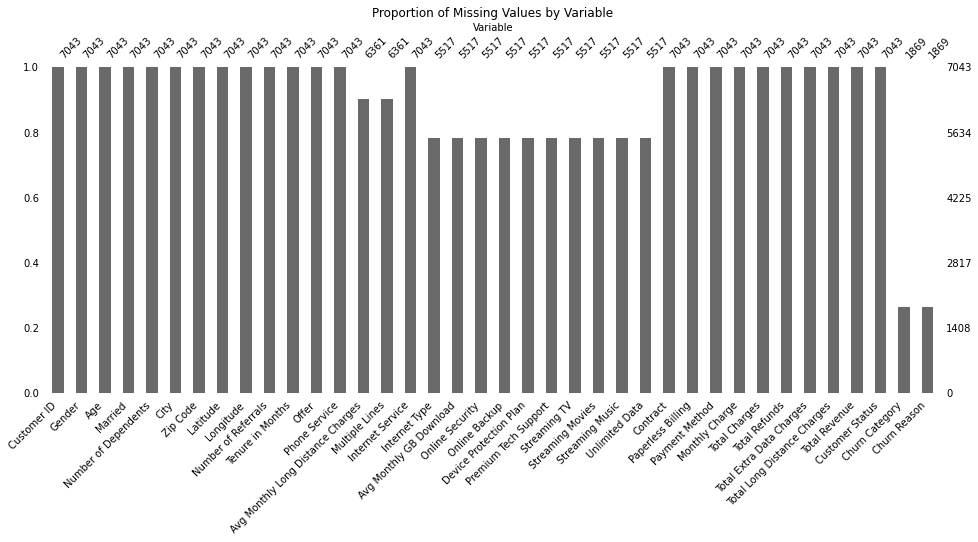

In [6]:
import missingno as msno

# Plot missing values as a bar chart
msno.bar(df,
         figsize=(16,6),  # Set the figure size
#          color='steelblue',    # Set the bar color
         fontsize=10,    # Set the font size
         labels=True,    # Show the variable labels
         log=False)      # Use a linear scale

# Customize the plot
plt.title('Proportion of Missing Values by Variable', fontsize=12)
plt.ylabel('Proportion of Missing Values', fontsize=10)
plt.xlabel('Variable', fontsize=10)

plt.show()

In [7]:
# Remove columns with too many missing values
# Remove columns that aren’t needed 
df = df.drop(['Churn Category', 'Churn Reason', 'Zip Code','Customer ID','Latitude','Longitude'], axis=1)
df.head()

Gender  Age Married  Number of Dependents          City  \
0  Female   37     Yes                     0  Frazier Park   
1    Male   46      No                     0      Glendale   
2    Male   50      No                     0    Costa Mesa   
3    Male   78     Yes                     0      Martinez   
4  Female   75     Yes                     0     Camarillo   

   Number of Referrals  Tenure in Months    Offer Phone Service  \
0                    2                 9     None           Yes   
1                    0                 9     None           Yes   
2                    0                 4  Offer E           Yes   
3                    1                13  Offer D           Yes   
4                    3                 3     None           Yes   

   Avg Monthly Long Distance Charges  ...        Contract Paperless Billing  \
0                              42.39  ...        One Year               Yes   
1                              10.69  ...  Month-to-Month                No   
2                              33.65  ...  Month-to-Month               Yes   
3                              27.82  ...  Month-to-Month               Yes   
4                               7.38  ...  Month-to-Month               Yes   

    Payment Method  Monthly Charge Total Charges Total Refunds  \
0      Credit Card            65.6        593.30          0.00   
1      Credit Card            -4.0        542.40         38.33   
2  Bank Withdrawal            73.9        280.85          0.00   
3  Bank Withdrawal            98.0       1237.85          0.00   
4      Credit Card            83.9        267.40          0.00   

  Total Extra Data Charges Total Long Distance Charges Total Revenue  \
0                        0                      381.51        974.81   
1                       10                       96.21        610.28   
2                        0                      134.60        415.45   
3                        0                      361.66       1599.51   
4                        0                       22.14        289.54   

  Customer Status  
0          Stayed  
1          Stayed  
2         Churned  
3         Churned  
4         Churned  

[5 rows x 32 columns]

In [8]:
# For later EDA on numerical and categorical variables 
df_num = df.select_dtypes('number')
df_object = df.select_dtypes('object')

In [9]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                7043 non-null   int64  
 1   Number of Dependents               7043 non-null   int64  
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Avg Monthly Long Distance Charges  6361 non-null   float64
 5   Avg Monthly GB Download            5517 non-null   float64
 6   Monthly Charge                     7043 non-null   float64
 7   Total Charges                      7043 non-null   float64
 8   Total Refunds                      7043 non-null   float64
 9   Total Extra Data Charges           7043 non-null   int64  
 10  Total Long Distance Charges        7043 non-null   float64
 11  Total Revenue                      7043 non-null   float

In [10]:
df_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  7043 non-null   object
 1   Married                 7043 non-null   object
 2   City                    7043 non-null   object
 3   Offer                   7043 non-null   object
 4   Phone Service           7043 non-null   object
 5   Multiple Lines          6361 non-null   object
 6   Internet Service        7043 non-null   object
 7   Internet Type           5517 non-null   object
 8   Online Security         5517 non-null   object
 9   Online Backup           5517 non-null   object
 10  Device Protection Plan  5517 non-null   object
 11  Premium Tech Support    5517 non-null   object
 12  Streaming TV            5517 non-null   object
 13  Streaming Movies        5517 non-null   object
 14  Streaming Music         5517 non-null   object
 15  Unli

In [11]:
df_num.columns

Index(['Age', 'Number of Dependents', 'Number of Referrals',
       'Tenure in Months', 'Avg Monthly Long Distance Charges',
       'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges',
       'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue'],
      dtype='object')

In [12]:
df_object.columns

Index(['Gender', 'Married', 'City', 'Offer', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Customer Status'],
      dtype='object')

In [13]:
df.isnull().sum()

Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                     1526
Streaming Music                      1526
Unlimited Data                       1526
Contract                                0
Paperless Billing                 

<AxesSubplot:>

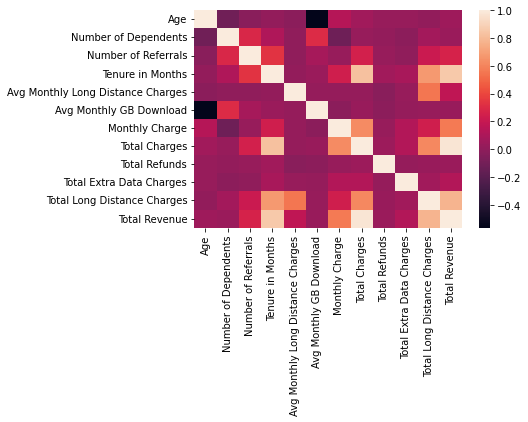

In [14]:
# Check the correlation between the features
corr = df.corr()
sns.heatmap(corr)

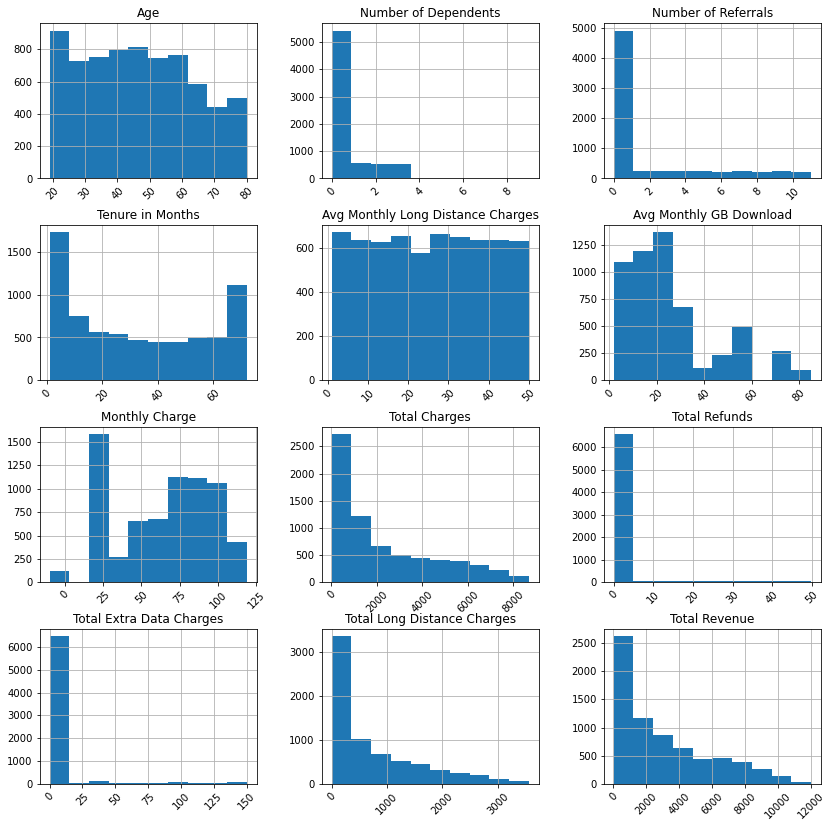

In [74]:
# Check distribution of numerical variables 
df_num.hist(figsize=(14,14), xrot=45);

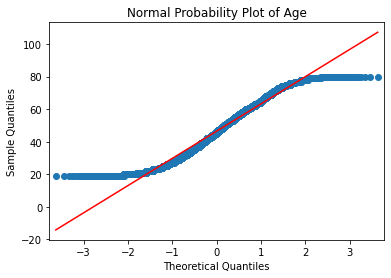

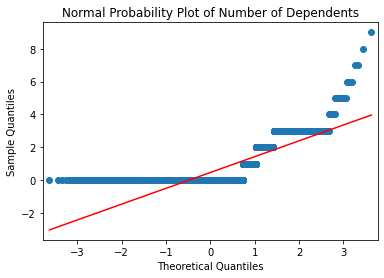

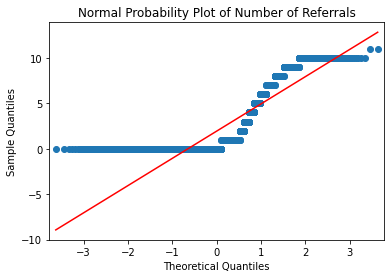

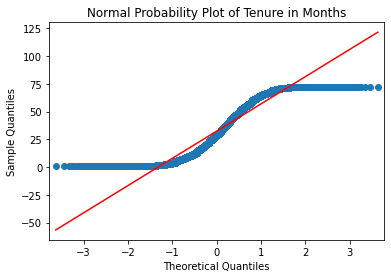

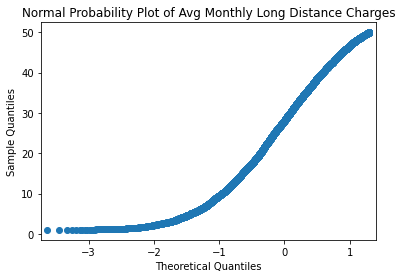

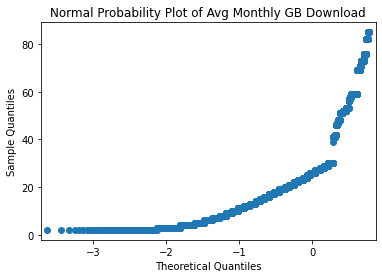

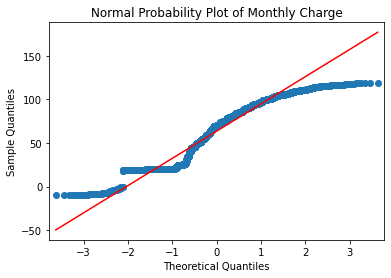

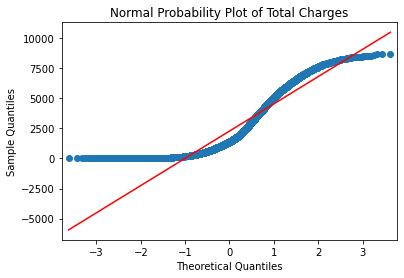

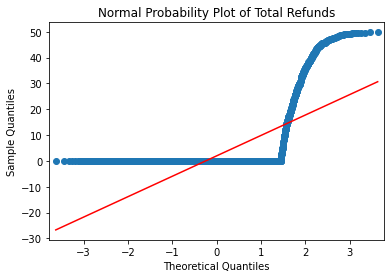

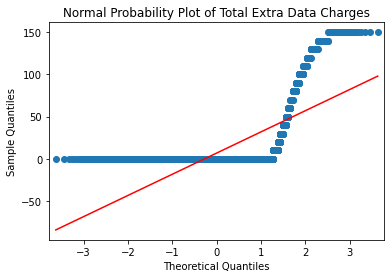

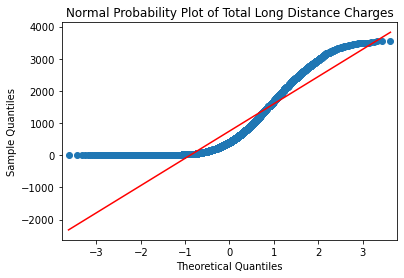

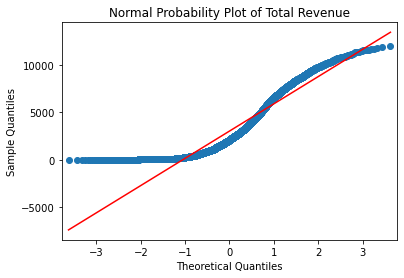

In [18]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Select numerical columns
num_cols = df_num.columns

# Create normal probability plots for each numerical column
for col in num_cols:
    sm.qqplot(df[col], line='s')
    plt.title(f'Normal Probability Plot of {col}')
    plt.show()


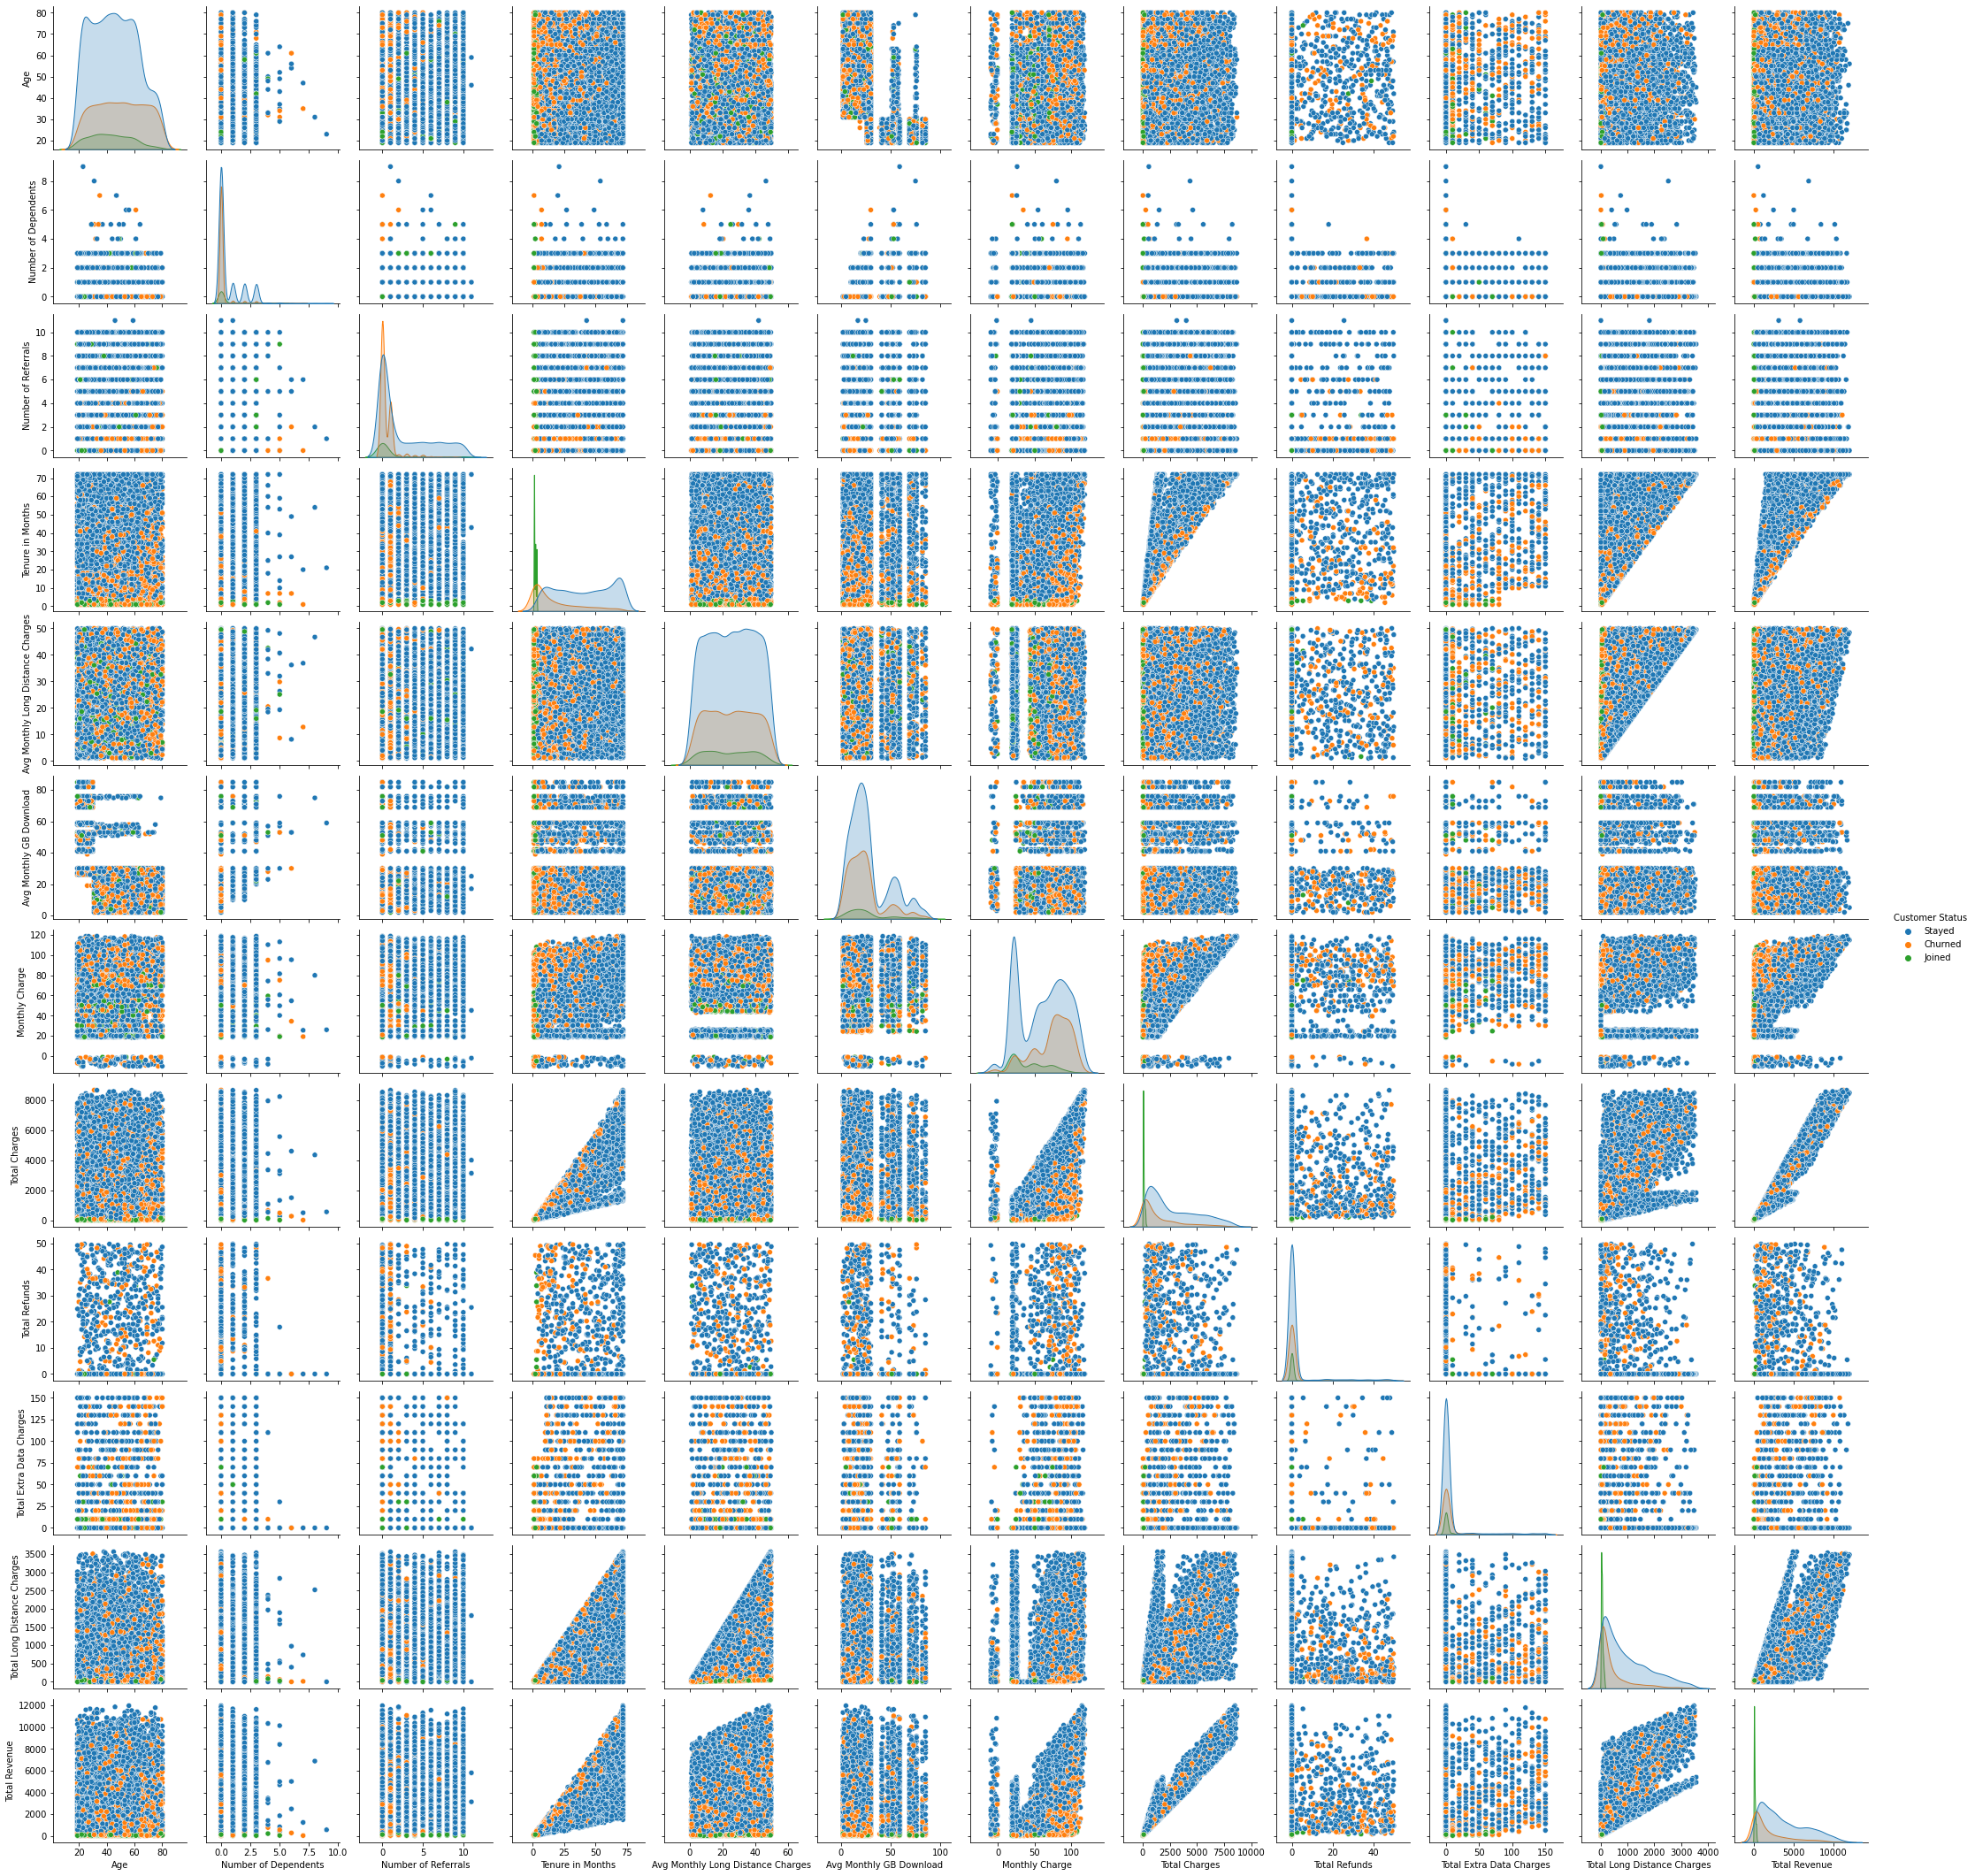

In [22]:
# Select the numerical columns and the target variable
numerical_cols = ['Age', 'Number of Dependents', 'Number of Referrals',
                  'Tenure in Months', 'Avg Monthly Long Distance Charges',
                  'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges',
                  'Total Refunds', 'Total Extra Data Charges',
                  'Total Long Distance Charges', 'Total Revenue']
target_var = 'Customer Status'
df_num1 = df[numerical_cols + [target_var]]

# Plot a pairplot of the numerical variables
sns.pairplot(df_num1, hue=target_var)
plt.show()

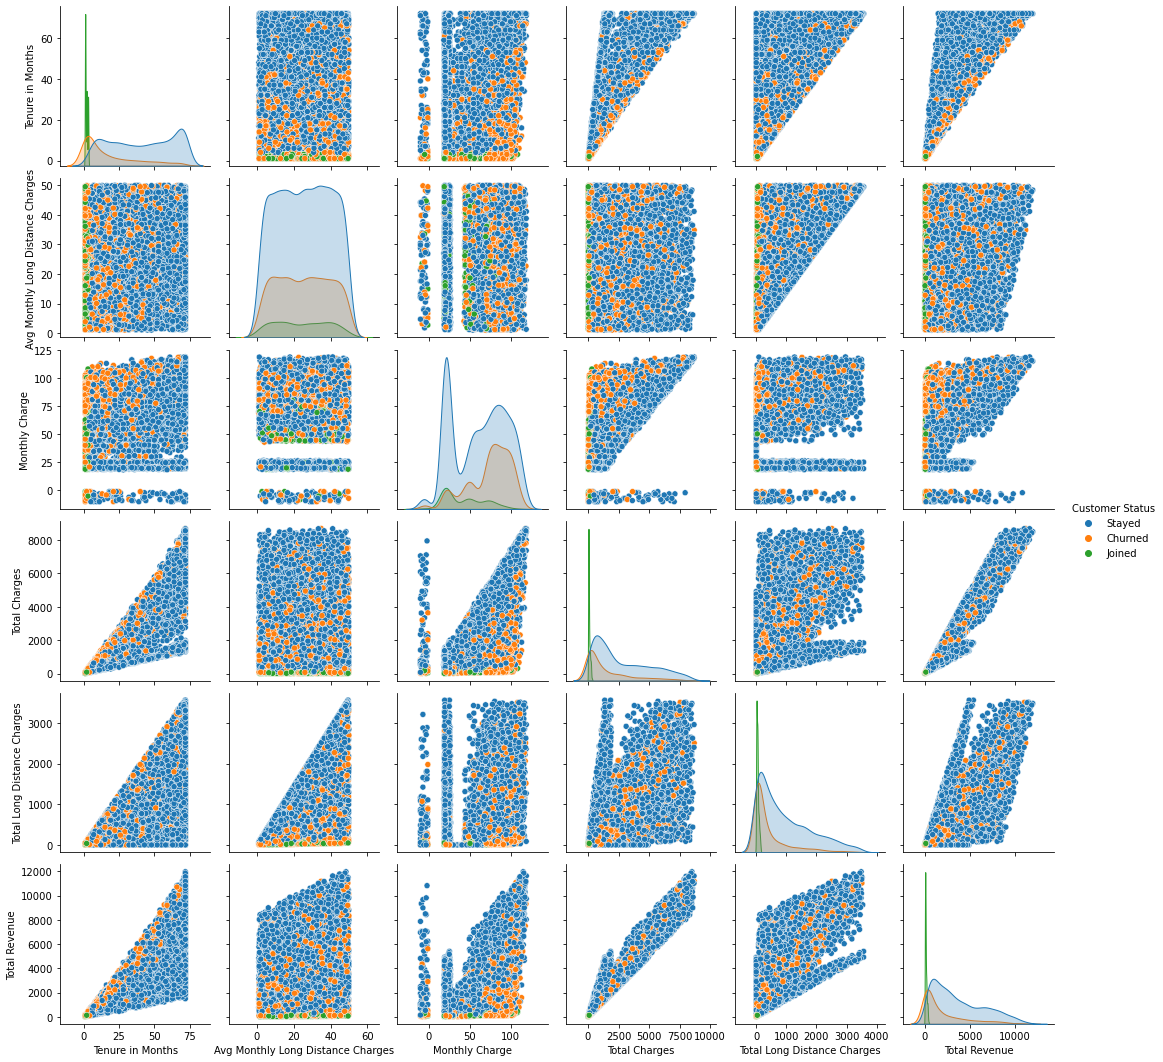

In [23]:
# Select the numerical columns and the target variable
numerical_cols = ['Tenure in Months', 'Avg Monthly Long Distance Charges',
                   'Monthly Charge', 'Total Charges','Total Long Distance Charges', 'Total Revenue']
target_var = 'Customer Status'
df_num1 = df[numerical_cols + [target_var]]

# Plot a pairplot of the numerical variables
sns.pairplot(df_num1, hue=target_var)
plt.show()

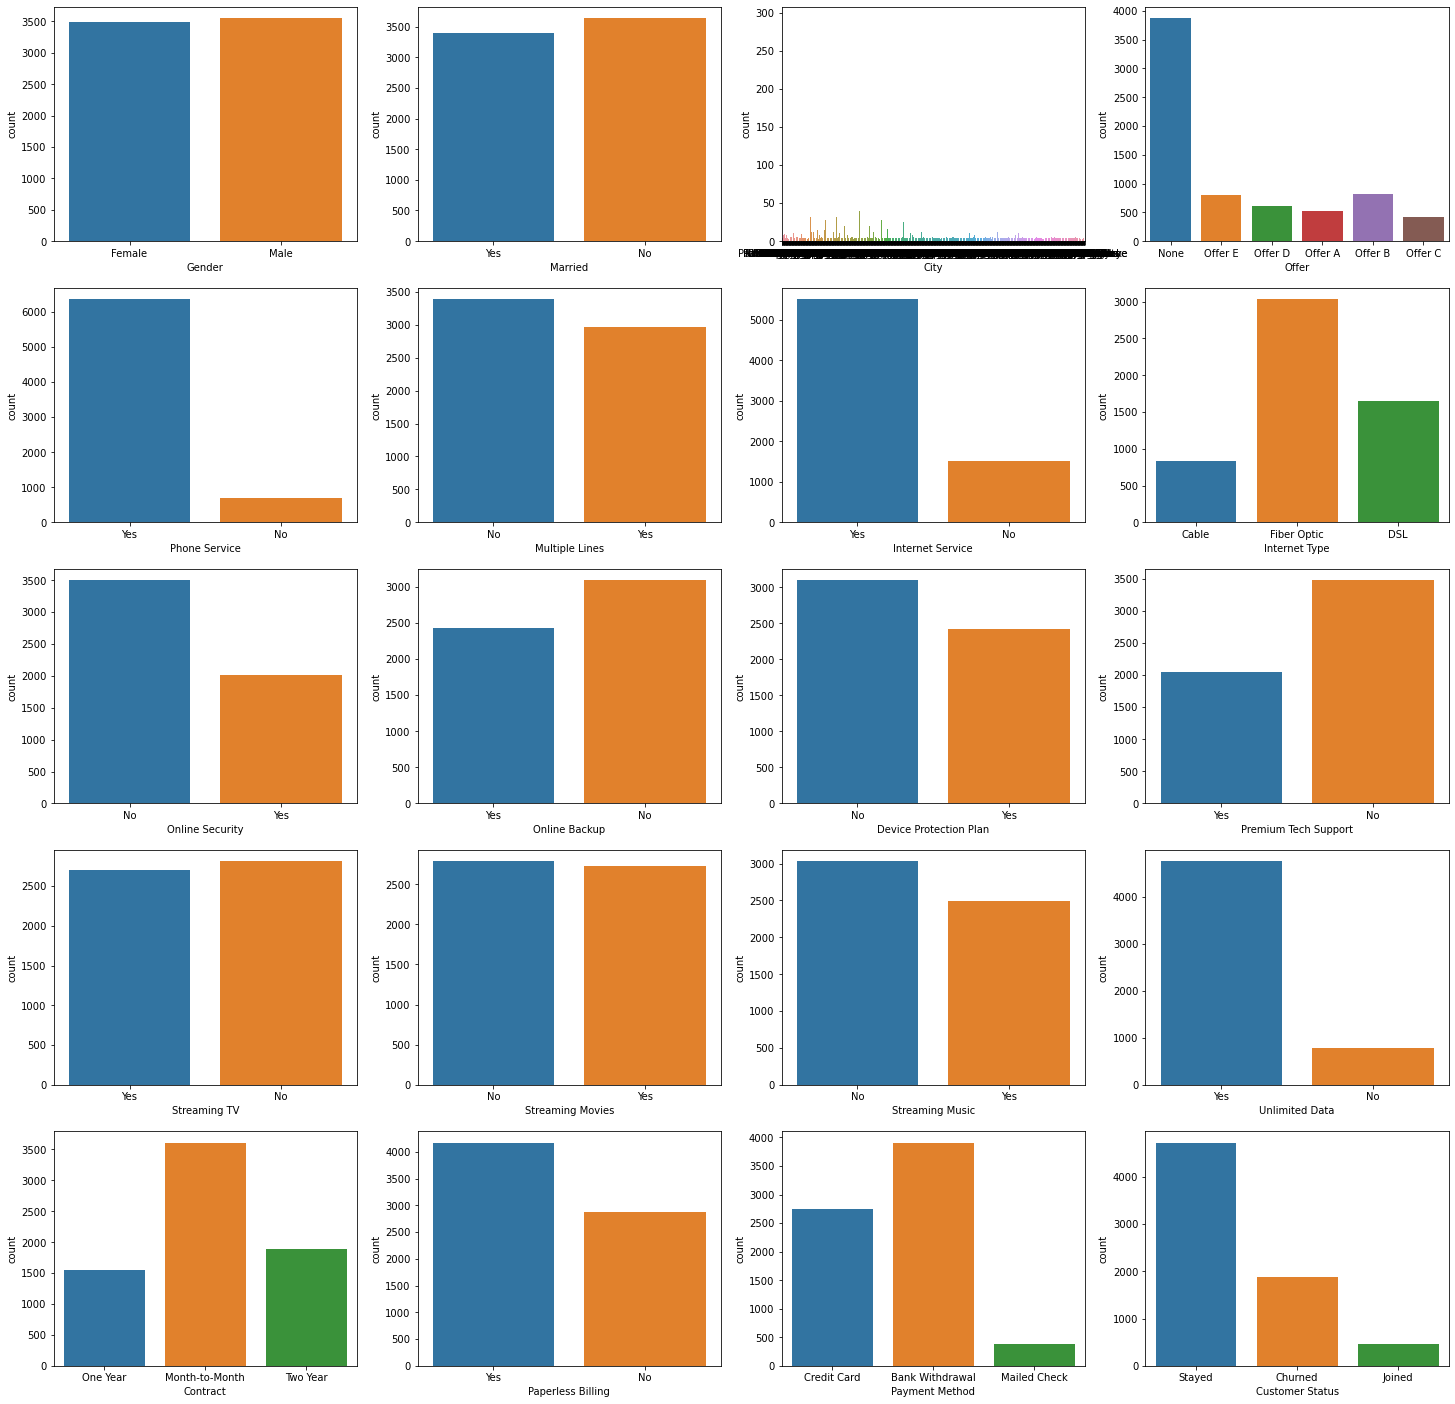

In [27]:
# Categorical
fig, axes = plt.subplots(5,4,figsize=(25,25))
for i,col in enumerate(df_object.columns):
    sns.countplot(data = df_object,x=col,ax=axes.flat[i])

/Users/liuxiaoyu/opt/anaconda3/envs/python3_7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Customer Status', ylabel='count'>

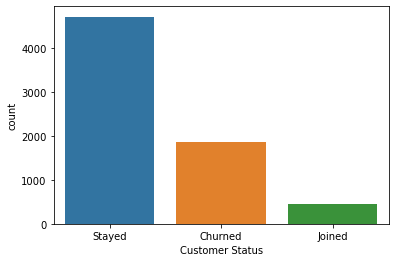

In [43]:
# Check the distribution of target variable
sns.countplot(df['Customer Status'])

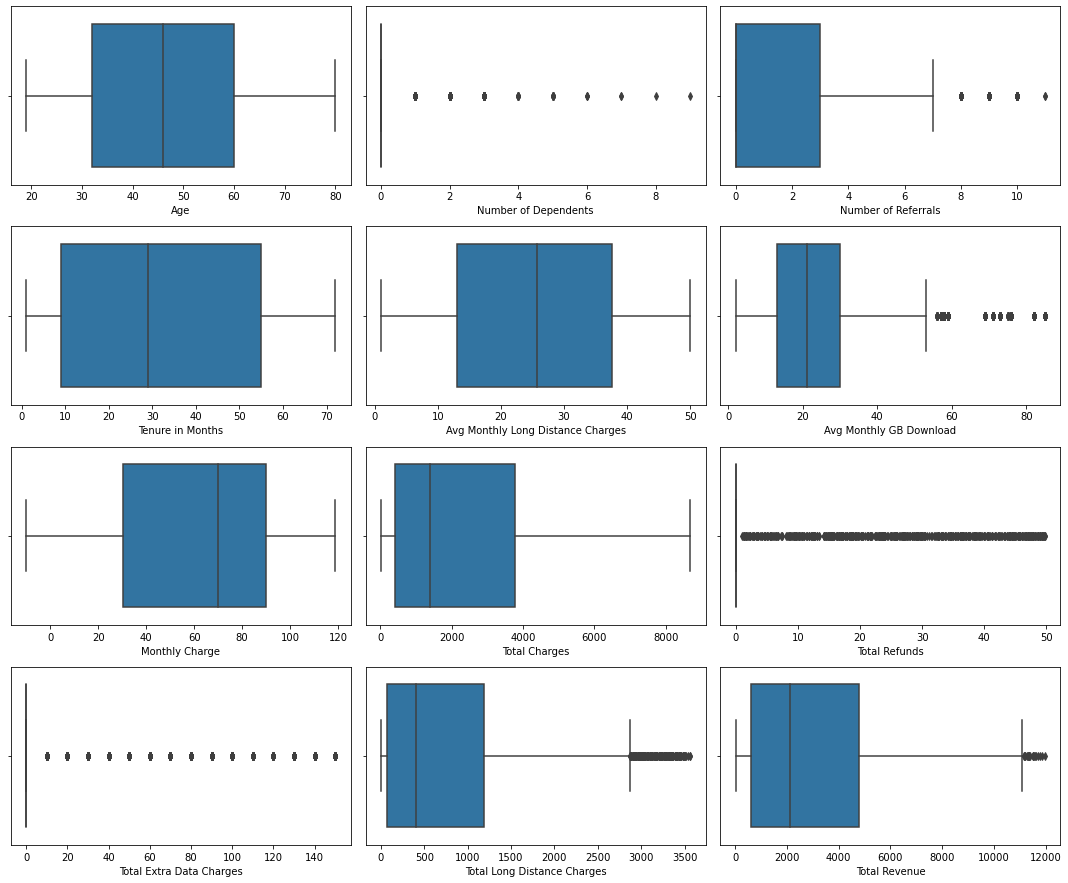

In [76]:
# Create subplots for box plots
fig, axes = plt.subplots(5, 3, figsize=(15, 15))

# Iterate through each numerical column and plot a box plot
for i, col in enumerate(df_num.columns):
    sns.boxplot(data=df_num, x=col, ax=axes.flat[i])

# Remove any empty subplots
for ax in axes.flat[len(df_num.columns):]:
    ax.remove()

plt.tight_layout()
plt.show()


# Feature Engineering

In [25]:
df1 = df.copy()

## Remove missing values

In [26]:
# Replace missing values in 'Avg Monthly Long Distance Charges' with mean
df1['Avg Monthly Long Distance Charges'].fillna(df['Avg Monthly Long Distance Charges'].mean(), inplace=True)


In [27]:
# Replace missing values in 'Multiple Lines' with mode
df1['Multiple Lines'].fillna(df['Multiple Lines'].mode()[0], inplace=True)


In [28]:
# Replace missing values in 'Avg Monthly GB Download' with median
df1['Avg Monthly GB Download'].fillna(df['Avg Monthly GB Download'].median(), inplace=True)


In [29]:
# Replace missing values in other columns with mode
df1['Internet Type'].fillna(df['Internet Type'].mode()[0], inplace=True)
df1['Online Security'].fillna(df['Online Security'].mode()[0], inplace=True)
df1['Online Backup'].fillna(df['Online Backup'].mode()[0], inplace=True)
df1['Device Protection Plan'].fillna(df['Device Protection Plan'].mode()[0], inplace=True)
df1['Premium Tech Support'].fillna(df['Premium Tech Support'].mode()[0], inplace=True)
df1['Streaming TV'].fillna(df['Streaming TV'].mode()[0], inplace=True)
df1['Streaming Movies'].fillna(df['Streaming Movies'].mode()[0], inplace=True)
df1['Streaming Music'].fillna(df['Streaming Music'].mode()[0], inplace=True)
df1['Unlimited Data'].fillna(df['Unlimited Data'].mode()[0], inplace=True)


In [30]:
df1.isna().sum()

Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge           

In [31]:
df1.shape

(7043, 32)

## Categorical variables encoding

In [43]:
df2 = df1.copy()
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [44]:
# Create an instance of LabelEncoder
le = LabelEncoder()

# Encode binary variables
binary_cols = ['Gender', 'Married', 'Phone Service', 'Multiple Lines', 
               'Internet Service', 'Online Security', 'Online Backup', 
               'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 
               'Streaming Movies', 'Streaming Music', 'Unlimited Data', 
               'Paperless Billing','City', 'Offer', 'Internet Type', 
                  'Contract', 'Payment Method','Customer Status']
for col in binary_cols:
    df2[col] = le.fit_transform(df2[col])


In [45]:
df2.head()

Gender  Age  Married  Number of Dependents  City  Number of Referrals  \
0       0   37        1                     0   346                    2   
1       1   46        0                     0   368                    0   
2       1   50        0                     0   222                    0   
3       1   78        1                     0   587                    1   
4       0   75        1                     0   139                    3   

   Tenure in Months  Offer  Phone Service  Avg Monthly Long Distance Charges  \
0                 9      0              1                              42.39   
1                 9      0              1                              10.69   
2                 4      5              1                              33.65   
3                13      4              1                              27.82   
4                 3      0              1                               7.38   

   ...  Contract  Paperless Billing  Payment Method  Monthly Charge  \
0  ...         1                  1               1            65.6   
1  ...         0                  0               1            -4.0   
2  ...         0                  1               0            73.9   
3  ...         0                  1               0            98.0   
4  ...         0                  1               1            83.9   

   Total Charges  Total Refunds  Total Extra Data Charges  \
0         593.30           0.00                         0   
1         542.40          38.33                        10   
2         280.85           0.00                         0   
3        1237.85           0.00                         0   
4         267.40           0.00                         0   

   Total Long Distance Charges  Total Revenue  Customer Status  
0                       381.51         974.81                2  
1                        96.21         610.28                2  
2                       134.60         415.45                0  
3                       361.66        1599.51                0  
4                        22.14         289.54                0  

[5 rows x 32 columns]

## Scale the data

In [46]:
cols_to_scale = ['Age','Number of Dependents','Number of Referrals',
                 'Tenure in Months','Avg Monthly Long Distance Charges',
                 'Avg Monthly GB Download','Monthly Charge', 'Total Charges',
                 'Total Extra Data Charges', 'Total Long Distance Charges',
                 'Total Revenue']


In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [54]:
df2.head(10)

Gender       Age  Married  Number of Dependents  City  Number of Referrals  \
0       0  0.295082        1              0.000000   346             0.181818   
1       1  0.442623        0              0.000000   368             0.000000   
2       1  0.508197        0              0.000000   222             0.000000   
3       1  0.967213        1              0.000000   587             0.090909   
4       0  0.918033        1              0.000000   139             0.272727   
5       0  0.065574        0              0.333333   608             0.000000   
6       0  0.786885        1              0.000000   546             0.090909   
7       1  0.540984        1              0.000000   653             0.727273   
8       0  0.803279        0              0.000000   924             0.000000   
9       0  0.393443        1              0.111111   915             0.272727   

   Tenure in Months  Offer  Phone Service  Avg Monthly Long Distance Charges  \
0          0.112676      0              1                           0.844835   
1          0.112676      0              1                           0.197632   
2          0.042254      5              1                           0.666394   
3          0.169014      4              1                           0.547366   
4          0.028169      0              1                           0.130053   
5          0.112676      5              1                           0.321764   
6          0.985915      1              1                           0.182728   
7          0.873239      2              1                           0.243977   
8          0.084507      5              1                           0.194365   
9          0.901408      0              1                           0.560433   

   ...  Contract  Paperless Billing  Payment Method  Monthly Charge  \
0  ...         1                  1               1        0.587184   
1  ...         0                  0               1        0.046602   
2  ...         0                  1               0        0.651650   
3  ...         0                  1               0        0.838835   
4  ...         0                  1               1        0.729320   
5  ...         0                  1               1        0.616699   
6  ...         2                  1               0        0.929709   
7  ...         2                  1               1        0.735146   
8  ...         2                  1               0        0.452039   
9  ...         2                  1               1        0.780194   

   Total Charges  Total Refunds  Total Extra Data Charges  \
0       0.066294           0.00                  0.000000   
1       0.060420          38.33                  0.066667   
2       0.030239           0.00                  0.000000   
3       0.140670           0.00                  0.000000   
4       0.028687           0.00                  0.000000   
5       0.063772           0.00                  0.000000   
6       0.909930           0.00                  0.000000   
7       0.618394           0.00                  0.133333   
8       0.037105           0.00                  0.000000   
9       0.685333           0.00                  0.000000   

   Total Long Distance Charges  Total Revenue  Customer Status  
0                     0.107024       0.079733                2  
1                     0.026989       0.049249                2  
2                     0.037759       0.032956                0  
3                     0.101455       0.131975                0  
4                     0.006211       0.022427                0  
5                     0.042340       0.058624                2  
6                     0.198377       0.718353                2  
7                     0.229045       0.517890                2  
8                     0.020678       0.032840                2  
9                     0.518947       0.651150                2  

[10 rows x 32 columns]

## Modeling

In [49]:
# import necessary libraries
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


In [50]:
# Define the features and target variable
X = df2.drop('Customer Status', axis=1)
y = df2['Customer Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 31)
(1409, 31)
(5634,)
(1409,)


In [52]:
# Define the models
# bagging_model = BaggingClassifier()
# boosting_model = AdaBoostClassifier()
# stacking_model = StackingClassifier(estimators=[('clf1', LogisticRegression()), ('clf2', DecisionTreeClassifier()), ('clf3', KNeighborsClassifier())])
xgb_model = XGBClassifier()

# Evaluate the models using k-fold cross-validation
# bagging_scores = cross_val_score(bagging_model, X_train, y_train, cv=5)
# boosting_scores = cross_val_score(boosting_model, X_train, y_train, cv=5)
# stacking_scores = cross_val_score(stacking_model, X_train, y_train, cv=5)
xgb_scores = cross_val_score(xgb_model, X_train, y_train, cv=5)

/Users/liuxiaoyu/opt/anaconda3/envs/python3_7/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:43:53] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/liuxiaoyu/opt/anaconda3/envs/python3_7/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:43:55] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/liuxiaoyu/opt/anaconda3/envs/python3_7/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:43:56] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/liuxiaoyu/opt/anaconda3/envs/python3_7/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:43:57] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/liuxiaoyu/opt/anaconda3/envs/python3_7/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:43:58] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [53]:
# Calculate the mean accuracy score for each model
# print(f"Bagging model accuracy: {bagging_scores.mean()}")
# print(f"Boosting model accuracy: {boosting_scores.mean()}")
# print(f"Stacking model accuracy: {stacking_scores.mean()}")
print(f"XGBoost model accuracy: {xgb_scores.mean()}")

XGBoost model accuracy: 0.8414995405838603


In [67]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

/Users/liuxiaoyu/opt/anaconda3/envs/python3_7/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:04:43] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [61]:
y_predicted = xgb.predict(X_test)
y_predicted[:10]

array([2, 2, 2, 1, 2, 0, 2, 2, 2, 2])

In [60]:
y_test[:10]

185     2
2715    2
3825    2
1807    1
132     2
1263    0
3732    2
1672    2
811     2
2526    2
Name: Customer Status, dtype: int64

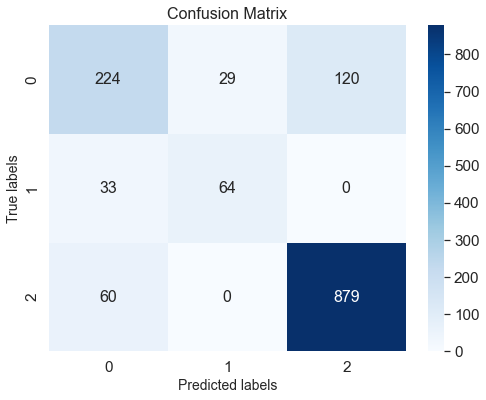

In [68]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)

plt.figure(figsize=(8, 6))
sn.set(font_scale=1.4) # increase font size
sn.heatmap(cm, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 16}) # use a blue color map
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()


In [65]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.71      0.60      0.65       373
           1       0.69      0.66      0.67        97
           2       0.88      0.94      0.91       939

    accuracy                           0.83      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.82      0.83      0.82      1409



In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predicted)

0.8282469836763662

<BarContainer object of 31 artists>

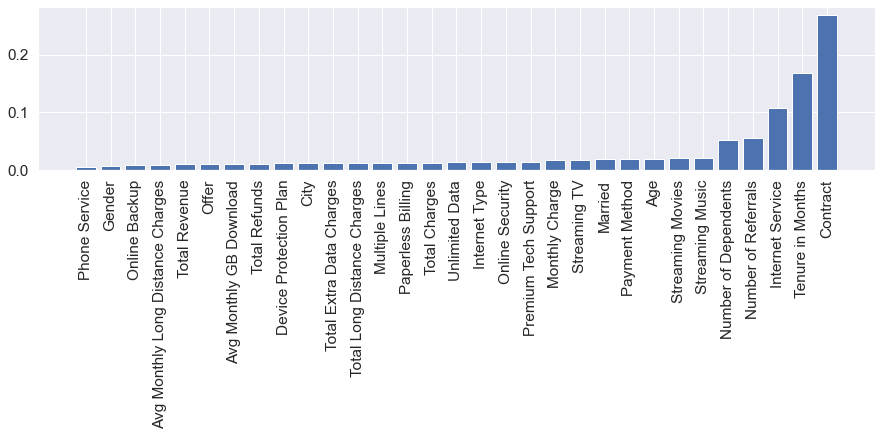

In [70]:
# build a feature map
sorted_idx = xgb.feature_importances_.argsort()
xgb.feature_importances_[sorted_idx]


plt.figure(figsize=(15,3))
plt.xticks(rotation = 90)
plt.bar(X_train.columns[sorted_idx], 
        xgb.feature_importances_[sorted_idx])

